## How are in-demand skills trending for Data Anakysts?

### Methodology

1. Aggregate skill counts monthly
2. Re-analyse based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
 # Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Set Universal Theme
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

c:\Users\PC-USER\anaconda3\envs\wcourse\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\PC-USER\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Wed Sep 25 07:19:23 2024).


In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

In [3]:
df_DA_US['month_nos'] = df_DA_US['job_posted_date'].dt.month

In [24]:
df_exploded = df_DA_US.explode('job_skills')

df_pivot = df_exploded.pivot_table(index='month_nos', columns='job_skills', aggfunc='size', fill_value= 0)

df_pivot.loc['Total'] = df_pivot.sum()

df_us = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index] # Need to pass in the index because without that it's a series

df_us = df_us.drop('Total')

df_us

job_skills,python,sql,r,sas,tableau,aws,spark,java,tensorflow,azure,...,fedora,mattermost,nuix,asp.net core,shogun,clickup,ocaml,wrike,symfony,couchdb
month_nos,,,,,,,,,,,,,,,,,,,,,
1,5243,3770,3362,1700,1630,1364,1356,916,896,817,...,0,0,1,1,0,1,0,0,1,1
2,3718,2670,2334,1144,1268,854,895,645,565,573,...,0,0,0,0,0,0,0,0,0,0
3,3394,2426,2189,1144,1126,848,787,575,529,538,...,0,0,0,0,1,0,0,0,0,0
4,3622,2463,2181,1204,1213,882,823,622,582,538,...,0,0,0,0,0,0,0,0,0,0
5,3232,2293,2016,1150,1174,797,774,629,517,521,...,0,0,0,0,0,0,0,0,0,0
6,3431,2442,2107,1158,1135,818,822,586,537,568,...,0,0,0,0,0,0,0,1,0,0
7,3541,2479,2210,1106,1223,860,802,581,570,607,...,1,0,0,0,0,0,0,0,0,0
8,4566,3324,2896,1598,1520,1076,1075,767,809,727,...,0,0,0,0,0,0,0,0,0,0
9,3112,2155,1791,1158,921,697,740,534,567,558,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_DA_US.groupby('month_nos').size()

month_nos
1     6915
2     4956
3     4779
4     4867
5     4377
6     4645
7     4876
8     6318
9     4568
10    4882
11    4175
12    3472
dtype: int64

In [26]:
df_total = df_DA_US.groupby('month_nos').size()
# To get the percentage of job postings by month, we need to divide the number of postings with a skill per month with the total number of posting that month. Pandas makes this super easy with the .div method instead of using a for loop.
df_final = df_us.div(df_total/100, axis=0)
df_final

job_skills,python,sql,r,sas,tableau,aws,spark,java,tensorflow,azure,...,fedora,mattermost,nuix,asp.net core,shogun,clickup,ocaml,wrike,symfony,couchdb
month_nos,,,,,,,,,,,,,,,,,,,,,
1,75.820680,54.519161,48.618944,24.584237,23.571945,19.725235,19.609544,13.246565,12.957339,11.814895,...,0.000000,0.000000,0.014461,0.014461,0.000000,0.014461,0.000000,0.000000,0.014461,0.014461
2,75.020178,53.874092,47.094431,23.083132,25.585149,17.231638,18.058918,13.014528,11.400323,11.561743,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,71.019042,50.763758,45.804562,23.938062,23.561415,17.744298,16.467880,12.031806,11.069261,11.257585,...,0.000000,0.000000,0.000000,0.000000,0.020925,0.000000,0.000000,0.000000,0.000000,0.000000
4,74.419560,50.606123,44.811999,24.738032,24.922950,18.122046,16.909801,12.779947,11.958085,11.054037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,73.840530,52.387480,46.058944,26.273703,26.822024,18.208819,17.683345,14.370573,11.811743,11.903130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,73.864370,52.572659,45.360603,24.930032,24.434876,17.610334,17.696448,12.615716,11.560818,12.228202,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021529,0.000000,0.000000
7,72.621001,50.840853,45.324036,22.682527,25.082034,17.637408,16.447908,11.915505,11.689910,12.448728,...,0.020509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,72.269706,52.611586,45.837290,25.292814,24.058246,17.030706,17.014878,12.139918,12.804685,11.506806,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,68.126095,47.176007,39.207531,25.350263,20.161996,15.258319,16.199650,11.690018,12.412434,12.215412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
df_final = df_final.reset_index()

df_final['month'] = df_final['month_nos'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_final = df_final.set_index('month')
df_final =df_final.drop(columns='month_nos')

In [28]:
df_final

job_skills,python,sql,r,sas,tableau,aws,spark,java,tensorflow,azure,...,fedora,mattermost,nuix,asp.net core,shogun,clickup,ocaml,wrike,symfony,couchdb
month,,,,,,,,,,,,,,,,,,,,,
Jan,75.820680,54.519161,48.618944,24.584237,23.571945,19.725235,19.609544,13.246565,12.957339,11.814895,...,0.000000,0.000000,0.014461,0.014461,0.000000,0.014461,0.000000,0.000000,0.014461,0.014461
Feb,75.020178,53.874092,47.094431,23.083132,25.585149,17.231638,18.058918,13.014528,11.400323,11.561743,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,71.019042,50.763758,45.804562,23.938062,23.561415,17.744298,16.467880,12.031806,11.069261,11.257585,...,0.000000,0.000000,0.000000,0.000000,0.020925,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,74.419560,50.606123,44.811999,24.738032,24.922950,18.122046,16.909801,12.779947,11.958085,11.054037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,73.840530,52.387480,46.058944,26.273703,26.822024,18.208819,17.683345,14.370573,11.811743,11.903130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,73.864370,52.572659,45.360603,24.930032,24.434876,17.610334,17.696448,12.615716,11.560818,12.228202,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021529,0.000000,0.000000
Jul,72.621001,50.840853,45.324036,22.682527,25.082034,17.637408,16.447908,11.915505,11.689910,12.448728,...,0.020509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,72.269706,52.611586,45.837290,25.292814,24.058246,17.030706,17.014878,12.139918,12.804685,11.506806,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,68.126095,47.176007,39.207531,25.350263,20.161996,15.258319,16.199650,11.690018,12.412434,12.215412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
df_plot = df_final.iloc[:, :5]

df_plot

job_skills,python,sql,r,sas,tableau
month,,,,,
Jan,75.820680,54.519161,48.618944,24.584237,23.571945
Feb,75.020178,53.874092,47.094431,23.083132,25.585149
Mar,71.019042,50.763758,45.804562,23.938062,23.561415
Apr,74.419560,50.606123,44.811999,24.738032,24.922950
May,73.840530,52.387480,46.058944,26.273703,26.822024
Jun,73.864370,52.572659,45.360603,24.930032,24.434876
Jul,72.621001,50.840853,45.324036,22.682527,25.082034
Aug,72.269706,52.611586,45.837290,25.292814,24.058246
Sep,68.126095,47.176007,39.207531,25.350263,20.161996


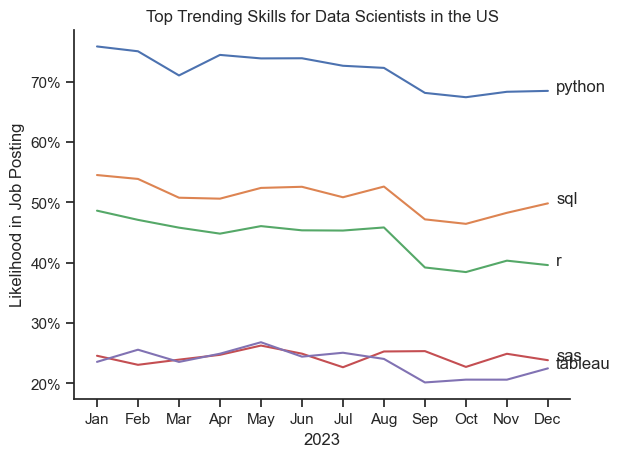

In [51]:
sns.lineplot(data=df_plot, dashes=False)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Top Trending Skills for Data Scientists in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i]) # 11 here is the x value and that specifies where you want the text to be on the chart. Here we're choosing Dec. For the y vakue, we have to use the iloc method to specify that we want the last value of each month. Then we select the name of the columns.
